# K- Means 

* The purpose of this model is to group the observations according to their similarities to each other.


* Clustering methods attempt to cluster observations using various distance metrics.


* Clusters are desired to be homogeneous within themselves and heterogeneous with respect to each other.



* Similarity within clusters must be maximum.


* The similarity between different clusters should be minimal.

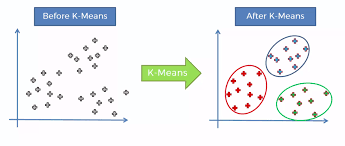

In [14]:
import pandas as pd
df = pd.read_csv("USArrests.csv").copy()
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [15]:
 df.index=df.iloc[:,0]
df.index  

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='Unnamed: 0')

In [16]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [17]:
df = df.iloc[:,1:5]
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [20]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


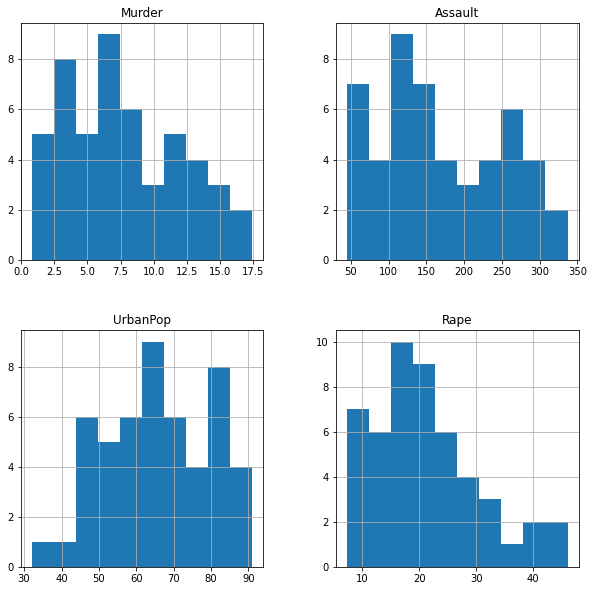

In [23]:
df.hist(figsize = (10,10));

## 1-) Model

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans

KMeans(n_clusters=2)

In [25]:
k_fit = kmeans.fit(df)

In [26]:
k_fit.n_clusters# that gives number of cluster

2

In [37]:
center_of_clusters=k_fit.cluster_centers_ #shows the most recently determined cluster center points
center_of_clusters

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

In [35]:
clusters=k_fit.labels_#shows which observation value belongs to which cluster
clusters

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

## 2-)Visualization

In [31]:
df.iloc[:,0]

Unnamed: 0
Alabama           13.2
Alaska            10.0
Arizona            8.1
Arkansas           8.8
California         9.0
Colorado           7.9
Connecticut        3.3
Delaware           5.9
Florida           15.4
Georgia           17.4
Hawaii             5.3
Idaho              2.6
Illinois          10.4
Indiana            7.2
Iowa               2.2
Kansas             6.0
Kentucky           9.7
Louisiana         15.4
Maine              2.1
Maryland          11.3
Massachusetts      4.4
Michigan          12.1
Minnesota          2.7
Mississippi       16.1
Missouri           9.0
Montana            6.0
Nebraska           4.3
Nevada            12.2
New Hampshire      2.1
New Jersey         7.4
New Mexico        11.4
New York          11.1
North Carolina    13.0
North Dakota       0.8
Ohio               7.3
Oklahoma           6.6
Oregon             4.9
Pennsylvania       6.3
Rhode Island       3.4
South Carolina    14.4
South Dakota       3.8
Tennessee         13.2
Texas             12.7


In [32]:
df.iloc[:,1]

Unnamed: 0
Alabama           236
Alaska            263
Arizona           294
Arkansas          190
California        276
Colorado          204
Connecticut       110
Delaware          238
Florida           335
Georgia           211
Hawaii             46
Idaho             120
Illinois          249
Indiana           113
Iowa               56
Kansas            115
Kentucky          109
Louisiana         249
Maine              83
Maryland          300
Massachusetts     149
Michigan          255
Minnesota          72
Mississippi       259
Missouri          178
Montana           109
Nebraska          102
Nevada            252
New Hampshire      57
New Jersey        159
New Mexico        285
New York          254
North Carolina    337
North Dakota       45
Ohio              120
Oklahoma          151
Oregon            159
Pennsylvania      106
Rhode Island      174
South Carolina    279
South Dakota       86
Tennessee         188
Texas             201
Utah              120
Vermont            48

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

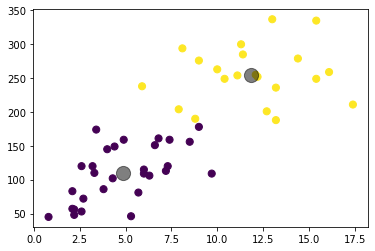

In [44]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = "viridis")
plt.scatter(center_of_clusters[:,0], center_of_clusters[:,1], c = "black", s = 200, alpha = 0.5);

##  3-)Clusters of Observvation

In [47]:
pd.DataFrame({"Province":df.index, "Clusters":clusters })[0:10]

,Province,Clusters
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,1
4,California,1
5,Colorado,1
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,1


In [48]:
df["Clusters"]=clusters

In [50]:
df.head(10)

,Murder,Assault,UrbanPop,Rape,Clusters
Unnamed: 0,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,1
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,1


## 4-)Determining the Optimum Cluster Number

In [53]:
from warnings import filterwarnings
filterwarnings('ignore')

In [54]:
#!pip install yellowbrick

In [55]:
from yellowbrick.cluster import KElbowVisualizer

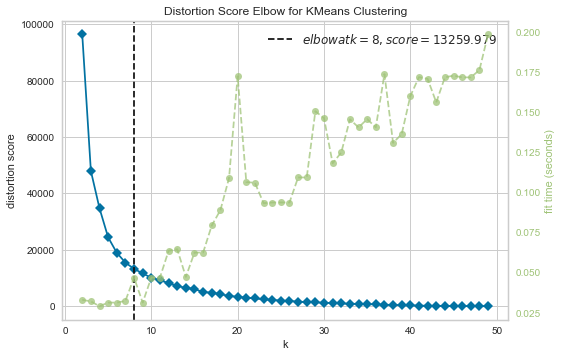

In [58]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))
# k=(2,50) means that  model is created from 2 cluster up to 50 cluster . 
visualizer.fit(df)
visualizer.poof();

* Graphs says that the optimum number of cluster is  9  


* But if we divide it into 9 clusters, it would be a disaster for the work


* Business knowledge comes to the fore here. You should know your business well, and these graphics should support you at your decision.


* We will divide it into 4 clusters in place of  9 clusters

In [59]:
kmeans1 = KMeans(n_clusters = 4)
k_fit1 = kmeans1.fit(df)
clusters1 = k_fit1.labels_

In [60]:
pd.DataFrame({"Province":df.index, "Clusters":clusters1 })[0:10]

,Province,Clusters
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,2


In [61]:
df["Clusters"]=clusters1

In [63]:
df.head(10)

,Murder,Assault,UrbanPop,Rape,Clusters
Unnamed: 0,,,,,
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,2
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,1
